In [2]:
import matplotlib.pyplot as plt
import torch

Matplotlib is building the font cache; this may take a moment.


In [3]:
def f(x: torch.Tensor) -> torch.Tensor:
    return 3 * x ** 2 + torch.sin(5*x)

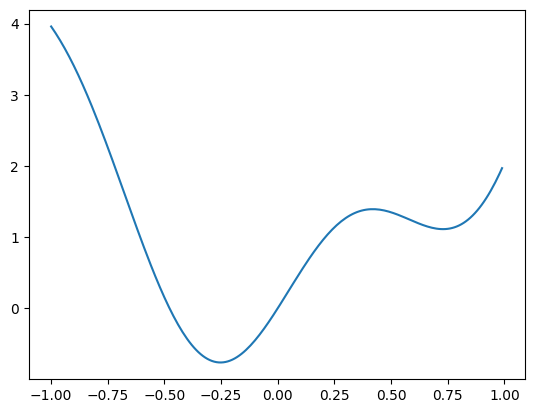

In [6]:
plt.plot(
    torch.arange(-1, 1, 0.01),
    f(torch.arange(-1, 1, 0.01))
)
plt.show()

The gradient descent will start at a location and then slowly reach the minimum point (here, at $x \approx -0.25$).

First, we need to compute the gradient of the function. 

In [7]:
def grad_f(x: torch.Tensor) -> torch.Tensor:
    """Returns the gradient of our function."""
    return 6 * x + 5 * torch.cos(5*x)

Now let's code up gradient descent. Let's start at a random location, calculate the gradient, and then move in the direction opposite of the gradient.

We'll do this for a fixed number of iterations and also have a step size as well that'll control how much we move.

We can also plot, in red, the actual path that the points took when they moved towards the bottom.

In [11]:
steps = 100
lr = 0.01

Starting at x = tensor([-1.4645]) and f(x) = tensor([5.5721])
After 100 steps, x is tensor([-0.2526]) and f(x) is tensor([-0.7616])


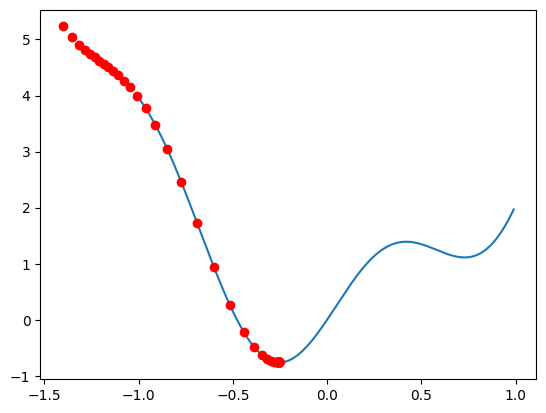

In [32]:
x = torch.randn(1)
all_x = []
print(f"Starting at x = {x} and f(x) = {f(x)}")
for _ in range(steps):
    x = x - lr * grad_f(x)
    all_x.append(x)
print(f"After {steps} steps, x is {x} and f(x) is {f(x)}")

# plot the original plot again
plt.plot(torch.arange(-1, 1, 0.01), f(torch.arange(-1, 1, 0.01)))

# plot the actual data points.
plt.plot(torch.stack(all_x), f(torch.stack(all_x)), 'ro')

If we run this multiple times, we can sometimes see that the descent gets stuck in the valley at $x \approx 0.75$, which is a property of gradient descent since we're not guaranteed to end up at the global minima (unless the function is convex).